In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [49]:
train_data = ImageDataGenerator(
    rescale=1/255.0,
    samplewise_center=True,
    featurewise_std_normalization = True,
    samplewise_std_normalization=True,
  
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=None
)
test_data = ImageDataGenerator(
    rescale=1/255.0)

### !!!절대 두 번 실행 금지!!!

In [50]:
#절대 두번 실행 금지

caltech_dir = "./data/hw5/train"
categories = [ "adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cate in enumerate(categories):
    
    #one-hot 돌리기.
    # label = [0 for i in range(nb_classes)]
    # label[idx] = 1

    image_dir = caltech_dir + "/" + cate
    files = glob.glob(image_dir+"/*.jpg")
    print(cate, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = load_img(f)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        # img = img.convert("RGB")
        # img = img.resize((image_w, image_h))
        # data = np.asarray(img)

        i=0
        for batch in train_data.flow(x, batch_size=1, save_to_dir=image_dir, 
            save_prefix='tri', save_format='jpg'):
            i += 1
            if i > 150: 
                break
        # X.append(data)
        # y.append(label)


adidas  파일 길이 :  237


c:\Users\box15\anaconda3\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\box15\anaconda3\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


converse  파일 길이 :  237
nike  파일 길이 :  237


KeyboardInterrupt: 

## 

In [59]:
train_gen = train_data.flow_from_directory(
        directory='./data/hw5/train',
        batch_size=32,
        target_size=(240, 240),
        class_mode='categorical',
        
        seed = 1337,
        )
test_gen = test_data.flow_from_directory(
        directory='./data/hw5/test',
        class_mode='categorical',
        
        target_size=(240, 240),
)

Found 29784 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [19]:
dir(train_gen)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',

In [52]:
train_gen.labels

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
# 트레인 데이타셋 가져오기

caltech_dir = "./data/hw5/train"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        # if i % 700 == 0:
        #     print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.01, shuffle = True)# 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy = (X_train, X_valid, y_train, y_valid)
np.save("./data/hw5/shose_train.npy", xy)

In [75]:
# 테스트셋 전처리

caltech_dir = "./data/hw5/test"
categories = ["adidas", "converse", "nike"]
nb_classes = len(categories)

image_w = 240
image_h = 240

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.01, shuffle = True) # 셔플을 해주기 위함 나중에 다시 합칠것이다.
xy1 = (X_train, X_valid, y_train, y_valid)
np.save("./data/hw5/shose_test.npy", xy1)

adidas  파일 길이 :  38
adidas  :  ./data/hw5/test/adidas\0.jpg
converse  파일 길이 :  38
converse  :  ./data/hw5/test/converse\0.jpg
nike  파일 길이 :  38
nike  :  ./data/hw5/test/nike\0.jpg


In [76]:
# 기본 데이타 셋 확정

X_train, X_valid, y_train, y_valid = np.load("./data/hw5/shose_train.npy",allow_pickle=True)
X_train = np.append(X_train,X_valid,axis=0)
y_train = np.append(y_train,y_valid,axis=0)

X_test, X_2, y_test, y_2 = np.load("./data/hw5/shose_test.npy",allow_pickle=True)
X_test = np.append(X_test,X_2,axis=0)
y_test = np.append(y_test,y_2,axis=0)

In [68]:
print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)

(3000, 240, 240, 3)
(114, 240, 240, 3)
(3000, 3)
(114, 3)


In [31]:
# 라벨 원-핫 인코딩 XXXXXXXXXXXXXXXXXXXX 안씀XXXXXXXXXXXXXXXXXXX

from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
 
categories = ["adidas", "converse", "nike"]

token = Tokenizer()
token.fit_on_texts(y_test)

token1 = Tokenizer()
token1.fit_on_texts(y_train)

# token2 = Tokenizer()
# token2.fit_on_texts(y_valid)
#print('word index: {}'.format(token.word_index))
y_ = token.texts_to_sequences(y_test)
y_1 = token1.texts_to_sequences(y_train)
# y_2 = token2.texts_to_sequences(y_valid)

y_test = tf.keras.utils.to_categorical(y_, len(token.word_index) +1 ) # 길이를 줘야하는데 벡터 맨 앞에 0이 필요해서 한 칸 더 추가.
y_train = tf.keras.utils.to_categorical(y_1, len(token1.word_index)+1 )
# y_valid = tf.keras.utils.to_categorical(y_2, len(token2.word_index) +1)
# y_test = to_categorical(y_test)
# y_train = to_categorical(y_train)
# y_valid = to_categorical(y_valid)

print(y_test.shape)
print(y_train.shape)
print(y_test)
# print(type(y_valid))

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [69]:
print(y_test)
# y_test = y_test[:,1:]
# y_train = y_train[:,1:]
# y_valid = y_valid[:,1:]

# print(y_test)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 

In [60]:
# y_train= to_categorical(train_gen.labels,3)
# y_test= to_categorical(test_gen.labels,3)

In [77]:
#make a model 1
model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3), input_shape = (240, 240, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 119, 119, 16)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 119, 119, 16)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 58, 58, 32)       

In [7]:
X_train

array([[[[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [112, 120, 123],
         [123, 131, 134],
         [115, 123, 126]],

        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [112, 120, 123],
         [123, 131, 134],
         [115, 123, 126]],

        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [112, 120, 123],
         [123, 131, 134],
         [115, 123, 126]],

        ...,

        [[129, 126, 121],
         [129, 126, 121],
         [129, 126, 121],
         ...,
         [ 91,  84,  74],
         [ 66,  59,  49],
         [ 84,  77,  67]],

        [[128, 125, 120],
         [128, 125, 120],
         [128, 125, 120],
         ...,
         [ 76,  69,  59],
         [ 81,  75,  63],
         [ 75,  69,  57]],

        [[127, 124, 119],
         [127, 124, 119],
         [127, 124, 119],
         ...,
         [ 90,  83,  73],
        

In [17]:
# 모델 2  사용안함!!!!!!!!!!!!!!!!!!!!!!!!
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:

X_train = X_train.astype('float32')
X_train = X_train / 255
X_test = X_test.astype('float32')
X_test = X_test / 255

In [79]:
# 모델 학습

modelpath = './data/model/shose_cnn_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)


history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 50, batch_size = 100, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [55]:
# confusion matrix 사용을 위한 라이브러리
from sklearn.metrics import confusion_matrix
import itertools

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(round(con_mat[i, j] * 100 / n)), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 예측값과 참값 
# pred_labels = np.argmax(predictions, axis=1)
# true_labels = test_set.labels

# #메인 실행 
# confusion_matrix = confusion_matrix(true_labels, pred_labels)
# plot_confusion_matrix(confusion_matrix, labels=labels, normalize=True)

4/4 [==============================] - 0s 6ms/step


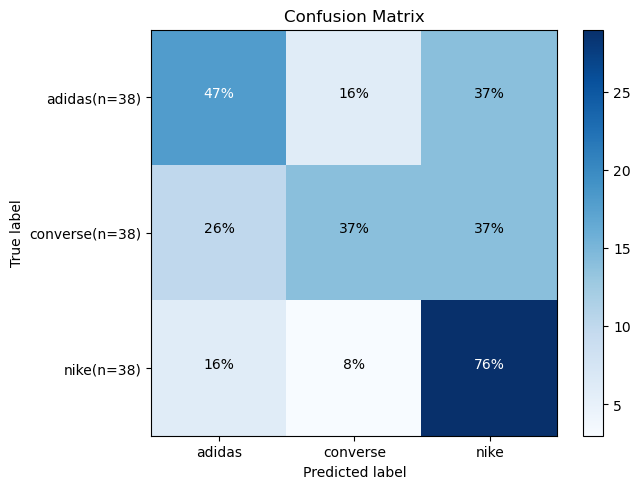

In [64]:
predictions = model.predict(X_test)

# 예측값과 참값 
pred_labels = np.argmax(predictions, axis=1)
true_labels = y_test

y_label = true_labels.tolist()
Y=[]
for i , vt in enumerate(y_label):
    if vt == [1,0,0]:
        Y.append(0)
    elif vt == [0,1,0]:
        Y.append(1)
    else:
        Y.append(2)
Y = np.array(Y)

#메인 실행 
# confusion_matrix(true_labels, pred_labels)
plot_confusion_matrix(confusion_matrix(Y, pred_labels), labels=["adidas", "converse", "nike"], normalize=True)

In [61]:
predictions

array([[2.44273096e-02, 5.89988351e-01, 3.85584325e-01],
       [2.06903160e-01, 1.54899433e-02, 7.77606905e-01],
       [1.49594666e-03, 9.52449441e-01, 4.60546203e-02],
       [6.07201934e-01, 3.43179011e-07, 3.92797649e-01],
       [5.67797720e-01, 2.66325628e-06, 4.32199687e-01],
       [3.17623377e-01, 4.84524399e-01, 1.97852150e-01],
       [1.16941631e-01, 3.46702263e-02, 8.48388135e-01],
       [7.34205730e-03, 9.93742235e-03, 9.82720435e-01],
       [9.95652795e-01, 3.47032095e-03, 8.76920472e-04],
       [5.18856868e-02, 9.83516748e-06, 9.48104441e-01],
       [2.89393049e-02, 4.49618995e-01, 5.21441698e-01],
       [2.10805267e-01, 6.77101374e-01, 1.12093419e-01],
       [9.04347673e-02, 3.96959990e-01, 5.12605190e-01],
       [4.26507264e-01, 2.36489087e-01, 3.37003678e-01],
       [4.85581607e-01, 4.77905750e-01, 3.65126058e-02],
       [1.15809351e-01, 3.03495210e-02, 8.53841126e-01],
       [1.27203256e-01, 2.75863022e-01, 5.96933722e-01],
       [4.91072506e-01, 4.91465

In [62]:
predictions = model.predict(X_test)

# 예측값과 참값 
pred_labels = np.argmax(predictions, axis=1)
true_labels = y_test

print(pred_labels)
type(true_labels)

4/4 [==============================] - 0s 83ms/step
[1 2 1 0 0 1 2 2 0 2 2 1 2 0 0 2 2 1 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 1 0
 2 2 2 2 2 0 0 0 1 0 2 2 2 0 2 1 1 0 0 2 0 0 1 2 1 0 2 0 2 0 0 2 0 2 2 2 2
 2 1 1 2 0 2 2 2 1 0 0 0 2 1 2 1 2 0 2 1 1 2 2 0 2 0 1 2 0 2 2 0 2 0 0 2 0
 2 0 0]


numpy.ndarray

In [50]:
y_label = true_labels.tolist()
Y=[]
for i , vt in enumerate(y_label):
    if vt == [1,0,0]:
        Y.append(0)
    elif vt == [0,1,0]:
        Y.append(1)
    else:
        Y.append(2)
Y = np.array(Y)
print(Y)


[0 2 0 1 2 1 0 0 0 2 2 1 1 0 0 0 1 1 1 0 2 0 0 1 2 2 0 2 2 1 0 2 2 1 0 1 1
 1 0 1 2 1 2 0 1 2 0 0 1 0 2 2 1 1 0 1 2 0 0 1 1 1 1 1 1 0 0 0 2 0 2 0 2 2
 1 0 2 1 0 1 2 1 1 2 0 0 2 2 2 1 0 1 2 0 1 2 2 1 2 0 0 2 2 2 1 0 2 1 2 2 1
 2 0 0]
